# Medical Insurance Cost Prediction 

In [38]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


## 1. Data Preprocessing and Loading Data

In [39]:
df = pd.read_csv("insurance.csv")
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [40]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


## 2. Exploratory Data Analysis (EDA)

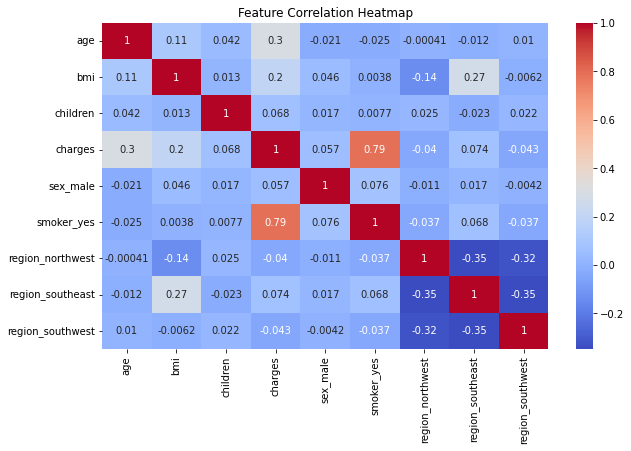

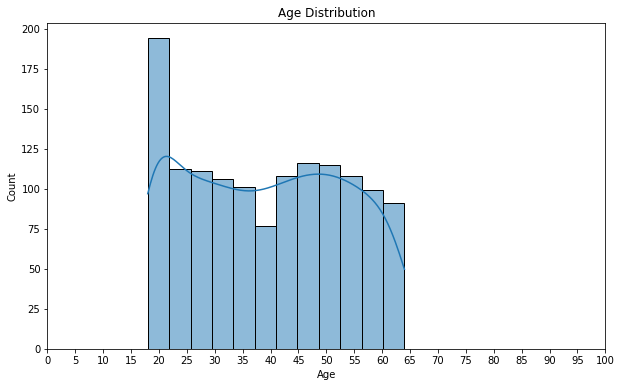

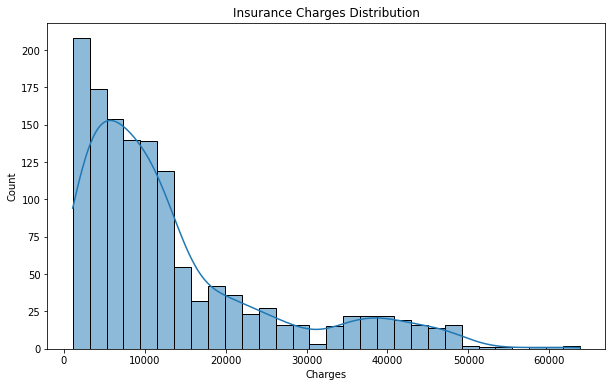

In [49]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=12, kde=True) 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.xticks(range(0, 101, 5))  
plt.show()


# Charges Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Insurance Charges Distribution')
plt.xlabel('Charges')
plt.show()

## 3. Feature Engineering

In [23]:
# Adding Interaction Terms
df_encoded['age_bmi'] = df_encoded['age'] * df_encoded['bmi']

# Splitting Data
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Features for Non-linear Relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


## 4. Model Training and Evaluation

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Model Performance Metrics (RMSE, MAE, MAPE)
results = {}
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    results[name] = [rmse, mae, mape * 100]
    print(f'{name} Evaluation Metrics:')
    print(f'  RMSE: {rmse}')
    print(f'  MAE: {mae}')
    print(f'  MAPE: {mape * 100}%\n')

# Display Model Comparison
results_df = pd.DataFrame(results, index=['RMSE', 'MAE', 'MAPE']).T
print("Model Comparison Table:")
print(results_df)

Linear Regression Evaluation Metrics:
  RMSE: 4547.609177511385
  MAE: 2776.7279665374213
  MAPE: 31.38384728089684%

Ridge Regression Evaluation Metrics:
  RMSE: 4523.5030432437
  MAE: 2732.6755550786856
  MAPE: 30.65159336682755%

Random Forest Evaluation Metrics:
  RMSE: 4516.970997421647
  MAE: 2480.704588205722
  MAPE: 31.246908748780832%

XGBoost Evaluation Metrics:
  RMSE: 4773.678882303803
  MAE: 2711.309450371363
  MAPE: 36.314744420662%

Model Comparison Table:
                          RMSE          MAE       MAPE
Linear Regression  4547.609178  2776.727967  31.383847
Ridge Regression   4523.503043  2732.675555  30.651593
Random Forest      4516.970997  2480.704588  31.246909
XGBoost            4773.678882  2711.309450  36.314744


## 5. Feature Importance Visualization (Random Forest)

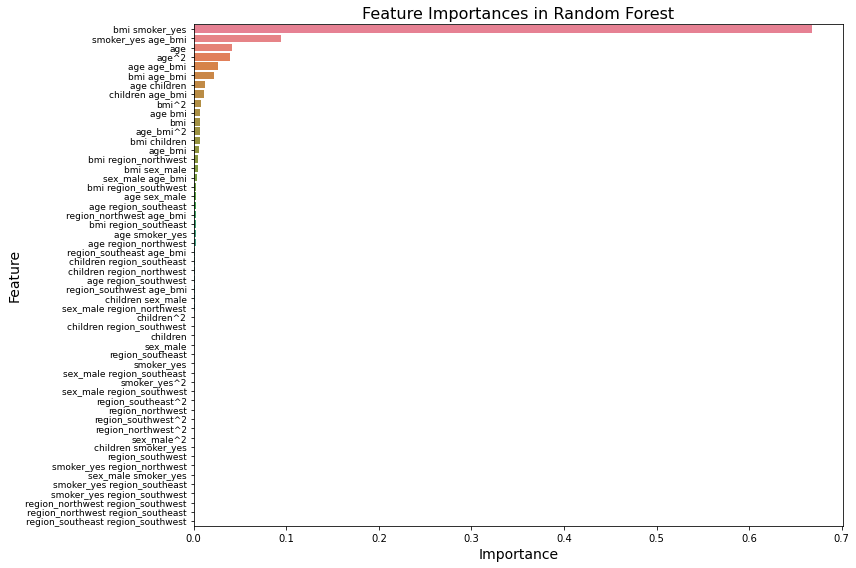

In [37]:
best_rf = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf.fit(X_train_poly, y_train)

importances = best_rf.feature_importances_
features = poly.get_feature_names_out(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', dodge=False, legend=False) 

plt.title('Feature Importances in Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)


plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()



## 6. Learning Curve Analysis (Using Best Model)

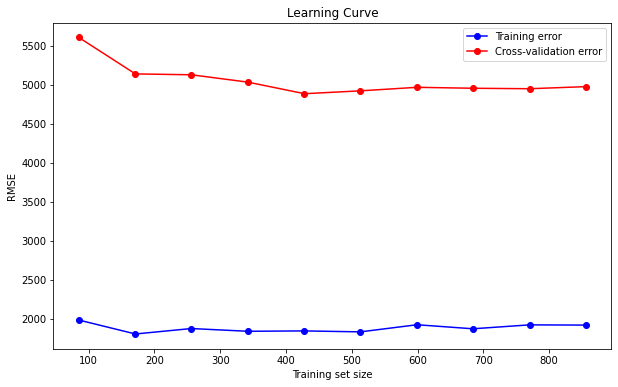

In [26]:

def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error', 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', color='blue', label="Training error")
    plt.plot(train_sizes, np.sqrt(test_scores_mean), 'o-', color='red', label="Cross-validation error")
    plt.title('Learning Curve')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_learning_curve(best_rf, X_train_poly, y_train)


## 7. Residual Analysis

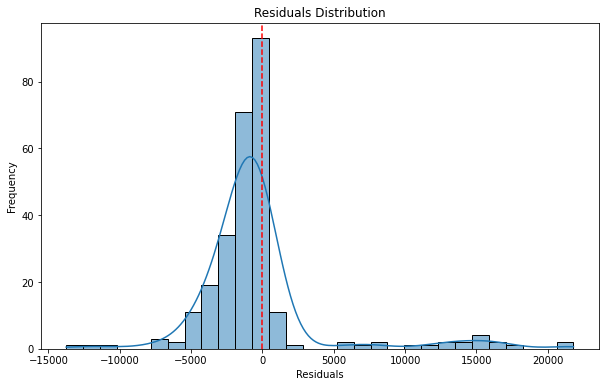

In [52]:

y_pred = best_rf.predict(X_test_poly)
residuals = y_test - y_pred

# Residual Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()




Category
Far Below 0         149
Close to 0           77
Very Far Above 0     20
Far Above 0          11
Very Far Below 0     11
Name: count, dtype: int64


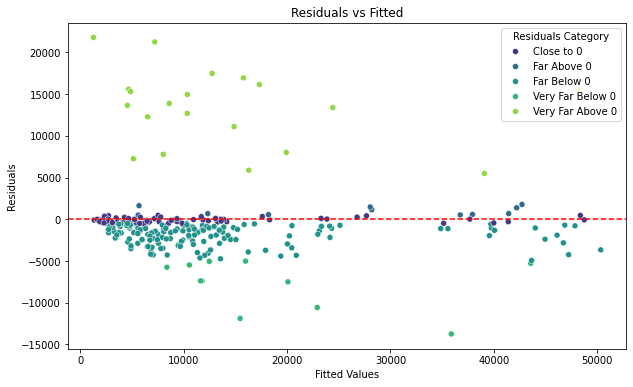

In [57]:
#Residuals vs fitted


residuals_df = pd.DataFrame({
    'Fitted': y_pred,
    'Residuals': residuals
})

def categorize_residual(residual):
    if residual < -5000:
        return 'Very Far Below 0'
    elif residual < -500:
        return 'Far Below 0'
    elif residual <= 500:
        return 'Close to 0'
    elif residual <= 5000:
        return 'Far Above 0'
    else:
        return 'Very Far Above 0'

residuals_df['Category'] = residuals_df['Residuals'].apply(categorize_residual)
category_counts = residuals_df['Category'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fitted', y='Residuals', hue='Category', data=residuals_df, palette='viridis')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(title='Residuals Category')
plt.show()



## 8. Sample data input for prediction

In [32]:
# Example person: age=35, bmi=28.5, children=2, sex='male', smoker='yes', region='southeast'
sample_data = pd.DataFrame({
    'age': [35],
    'bmi': [28.5],
    'children': [2],
    'sex_male': [1],    # Male
    'smoker_yes': [1],  # Smoker
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

# Add interaction term
sample_data['age_bmi'] = sample_data['age'] * sample_data['bmi']

# Polynomial transformation and scaling
sample_data_poly = poly.transform(sample_data)
sample_data_poly = scaler.transform(sample_data_poly)

# Choose the best model for prediction (e.g., random forest)
predicted_charge = best_rf.predict(sample_data_poly)

print("Predicted Insurance Charge:", predicted_charge[0])


Predicted Insurance Charge: 22428.352676900002


## 9. Conclusion

In [29]:
print("Summary of Findings:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics[0]:.2f}, MAE = {metrics[1]:.2f}, MAPE = {metrics[2]:.2f}%")

# Find model with the lowest RMSE   
best_model_name = min(results, key=lambda x: results[x][0])  
print(f"\nBest Performing Model: {best_model_name}")

# Display top features
print("\nFeature Importance Insights:")
print(importance_df.head())  

Summary of Findings:
Linear Regression: RMSE = 4547.61, MAE = 2776.73, MAPE = 31.38%
Ridge Regression: RMSE = 4523.50, MAE = 2732.68, MAPE = 30.65%
Random Forest: RMSE = 4516.97, MAE = 2480.70, MAPE = 31.25%
XGBoost: RMSE = 4773.68, MAE = 2711.31, MAPE = 36.31%

Best Performing Model: Random Forest

Feature Importance Insights:
               Feature  Importance
21      bmi smoker_yes    0.668013
43  smoker_yes age_bmi    0.094563
0                  age    0.041778
9                age^2    0.039001
17         age age_bmi    0.026686
